In [7]:
import gc
import pandas as pd
from constants import *
from os.path import join
import json
from topic_reranking import *
%pylab inline
#pylab.rcParams['figure.figsize'] = (20, 20)
import seaborn as sns
from itertools import islice

Populating the interactive namespace from numpy and matplotlib


/home/andreas/bin/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['time']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [8]:
# removing the callbacks from already trained ldamodels. 
# The callbacks take an unreasonable amount of space and will not be needed anymore.
# can also be used to check which models have already been trained.
versions = ['noun', 'noun-verb', 'noun-verb-adj']
PARAMS = ('a42', 'b42', 'c42', 'd42', 'e42')
NBTOPICS = (10, 25, 50, 100)
slize = None

for version in versions[:slize]:
    for dataset in islice(sorted(DATASETS.values()), slize):
        for param in PARAMS[:slize]:
            for nb in NBTOPICS[:slize]:
                gc.collect()
                d = join(ETL_PATH, 'LDAmodel', version, param)
                f = f'{dataset}_LDAmodel_{param}_{nb}'
                df = join(d, f)
                print(df, end='')
                try:
                    l = LdaModel.load(df)
                    print('  -- ok')
                except Exception as e: 
                    print('  -- ', e)
                else:
                    if l.callbacks is not None:
                        l.callbacks = None
                        ds = join(d, 'small')
                        dsf = join(ds, f)
                        print('   saving ', dsf)
                        if not exists(ds): makedirs(ds)
                        l.save(dsf)
                        print('   loading', dsf, end='')
                        try:
                            LdaModel.load(dsf)
                            print('  -- ok')
                        except Exception as e: 
                            print('  -- ', e)
                    del l
                gc.collect()

../data/preprocessed/LDAmodel/noun/a42/Europarl_LDAmodel_a42_10  -- ok
../data/preprocessed/LDAmodel/noun/a42/Europarl_LDAmodel_a42_25  -- ok
../data/preprocessed/LDAmodel/noun/a42/Europarl_LDAmodel_a42_50  -- ok
../data/preprocessed/LDAmodel/noun/a42/Europarl_LDAmodel_a42_100  -- ok
../data/preprocessed/LDAmodel/noun/b42/Europarl_LDAmodel_b42_10  -- ok
../data/preprocessed/LDAmodel/noun/b42/Europarl_LDAmodel_b42_25  -- ok
../data/preprocessed/LDAmodel/noun/b42/Europarl_LDAmodel_b42_50  -- ok
../data/preprocessed/LDAmodel/noun/b42/Europarl_LDAmodel_b42_100  -- ok
../data/preprocessed/LDAmodel/noun/c42/Europarl_LDAmodel_c42_10  -- ok
../data/preprocessed/LDAmodel/noun/c42/Europarl_LDAmodel_c42_25  -- ok
../data/preprocessed/LDAmodel/noun/c42/Europarl_LDAmodel_c42_50  -- ok
../data/preprocessed/LDAmodel/noun/c42/Europarl_LDAmodel_c42_100  -- ok
../data/preprocessed/LDAmodel/noun/d42/Europarl_LDAmodel_d42_10  -- ok
../data/preprocessed/LDAmodel/noun/d42/Europarl_LDAmodel_d42_25  -- ok
../

../data/preprocessed/LDAmodel/noun/c42/dewac_LDAmodel_c42_25  --  [Errno 2] No such file or directory: '../data/preprocessed/LDAmodel/noun/c42/dewac_LDAmodel_c42_25'
../data/preprocessed/LDAmodel/noun/c42/dewac_LDAmodel_c42_50  --  [Errno 2] No such file or directory: '../data/preprocessed/LDAmodel/noun/c42/dewac_LDAmodel_c42_50'
../data/preprocessed/LDAmodel/noun/c42/dewac_LDAmodel_c42_100  --  [Errno 2] No such file or directory: '../data/preprocessed/LDAmodel/noun/c42/dewac_LDAmodel_c42_100'
../data/preprocessed/LDAmodel/noun/d42/dewac_LDAmodel_d42_10  --  [Errno 2] No such file or directory: '../data/preprocessed/LDAmodel/noun/d42/dewac_LDAmodel_d42_10'
../data/preprocessed/LDAmodel/noun/d42/dewac_LDAmodel_d42_25  --  [Errno 2] No such file or directory: '../data/preprocessed/LDAmodel/noun/d42/dewac_LDAmodel_d42_25'
../data/preprocessed/LDAmodel/noun/d42/dewac_LDAmodel_d42_50  --  [Errno 2] No such file or directory: '../data/preprocessed/LDAmodel/noun/d42/dewac_LDAmodel_d42_50'
..

../data/preprocessed/LDAmodel/noun-verb/a42/FAZ_LDAmodel_a42_25  -- ok
../data/preprocessed/LDAmodel/noun-verb/a42/FAZ_LDAmodel_a42_50  -- ok
../data/preprocessed/LDAmodel/noun-verb/a42/FAZ_LDAmodel_a42_100  -- ok
../data/preprocessed/LDAmodel/noun-verb/b42/FAZ_LDAmodel_b42_10  -- ok
../data/preprocessed/LDAmodel/noun-verb/b42/FAZ_LDAmodel_b42_25  -- ok
../data/preprocessed/LDAmodel/noun-verb/b42/FAZ_LDAmodel_b42_50  -- ok
../data/preprocessed/LDAmodel/noun-verb/b42/FAZ_LDAmodel_b42_100  -- ok
../data/preprocessed/LDAmodel/noun-verb/c42/FAZ_LDAmodel_c42_10  -- ok
../data/preprocessed/LDAmodel/noun-verb/c42/FAZ_LDAmodel_c42_25  -- ok
../data/preprocessed/LDAmodel/noun-verb/c42/FAZ_LDAmodel_c42_50  -- ok
../data/preprocessed/LDAmodel/noun-verb/c42/FAZ_LDAmodel_c42_100  -- ok
../data/preprocessed/LDAmodel/noun-verb/d42/FAZ_LDAmodel_d42_10  -- ok
../data/preprocessed/LDAmodel/noun-verb/d42/FAZ_LDAmodel_d42_25  -- ok
../data/preprocessed/LDAmodel/noun-verb/d42/FAZ_LDAmodel_d42_50  -- ok
../

../data/preprocessed/LDAmodel/noun-verb/e42/dewac_LDAmodel_e42_50  --  [Errno 2] No such file or directory: '../data/preprocessed/LDAmodel/noun-verb/e42/dewac_LDAmodel_e42_50'
../data/preprocessed/LDAmodel/noun-verb/e42/dewac_LDAmodel_e42_100  -- ok
../data/preprocessed/LDAmodel/noun-verb/a42/dewac_nbfiles01_LDAmodel_a42_10  -- ok
../data/preprocessed/LDAmodel/noun-verb/a42/dewac_nbfiles01_LDAmodel_a42_25  -- ok
../data/preprocessed/LDAmodel/noun-verb/a42/dewac_nbfiles01_LDAmodel_a42_50  -- ok
../data/preprocessed/LDAmodel/noun-verb/a42/dewac_nbfiles01_LDAmodel_a42_100  -- ok
../data/preprocessed/LDAmodel/noun-verb/b42/dewac_nbfiles01_LDAmodel_b42_10  -- ok
../data/preprocessed/LDAmodel/noun-verb/b42/dewac_nbfiles01_LDAmodel_b42_25  -- ok
../data/preprocessed/LDAmodel/noun-verb/b42/dewac_nbfiles01_LDAmodel_b42_50  -- ok
../data/preprocessed/LDAmodel/noun-verb/b42/dewac_nbfiles01_LDAmodel_b42_100  -- ok
../data/preprocessed/LDAmodel/noun-verb/c42/dewac_nbfiles01_LDAmodel_c42_10  -- ok
.

../data/preprocessed/LDAmodel/noun-verb-adj/e42/FAZ_LDAmodel_e42_10  -- ok
../data/preprocessed/LDAmodel/noun-verb-adj/e42/FAZ_LDAmodel_e42_25  -- ok
../data/preprocessed/LDAmodel/noun-verb-adj/e42/FAZ_LDAmodel_e42_50  -- ok
../data/preprocessed/LDAmodel/noun-verb-adj/e42/FAZ_LDAmodel_e42_100  -- ok
../data/preprocessed/LDAmodel/noun-verb-adj/a42/FOCUS_LDAmodel_a42_10  -- ok
../data/preprocessed/LDAmodel/noun-verb-adj/a42/FOCUS_LDAmodel_a42_25  -- ok
../data/preprocessed/LDAmodel/noun-verb-adj/a42/FOCUS_LDAmodel_a42_50  -- ok
../data/preprocessed/LDAmodel/noun-verb-adj/a42/FOCUS_LDAmodel_a42_100  -- ok
../data/preprocessed/LDAmodel/noun-verb-adj/b42/FOCUS_LDAmodel_b42_10  -- ok
../data/preprocessed/LDAmodel/noun-verb-adj/b42/FOCUS_LDAmodel_b42_25  -- ok
../data/preprocessed/LDAmodel/noun-verb-adj/b42/FOCUS_LDAmodel_b42_50  -- ok
../data/preprocessed/LDAmodel/noun-verb-adj/b42/FOCUS_LDAmodel_b42_100  -- ok
../data/preprocessed/LDAmodel/noun-verb-adj/c42/FOCUS_LDAmodel_c42_10  -- ok
../d

../data/preprocessed/LDAmodel/noun-verb-adj/a42/dewac_nbfiles01_LDAmodel_a42_10  -- ok
../data/preprocessed/LDAmodel/noun-verb-adj/a42/dewac_nbfiles01_LDAmodel_a42_25  -- ok
../data/preprocessed/LDAmodel/noun-verb-adj/a42/dewac_nbfiles01_LDAmodel_a42_50  -- ok
../data/preprocessed/LDAmodel/noun-verb-adj/a42/dewac_nbfiles01_LDAmodel_a42_100  -- ok
../data/preprocessed/LDAmodel/noun-verb-adj/b42/dewac_nbfiles01_LDAmodel_b42_10  -- ok
../data/preprocessed/LDAmodel/noun-verb-adj/b42/dewac_nbfiles01_LDAmodel_b42_25  -- ok
../data/preprocessed/LDAmodel/noun-verb-adj/b42/dewac_nbfiles01_LDAmodel_b42_50  -- ok
../data/preprocessed/LDAmodel/noun-verb-adj/b42/dewac_nbfiles01_LDAmodel_b42_100  -- ok
../data/preprocessed/LDAmodel/noun-verb-adj/c42/dewac_nbfiles01_LDAmodel_c42_10  -- ok
../data/preprocessed/LDAmodel/noun-verb-adj/c42/dewac_nbfiles01_LDAmodel_c42_25  -- ok
../data/preprocessed/LDAmodel/noun-verb-adj/c42/dewac_nbfiles01_LDAmodel_c42_50  -- ok
../data/preprocessed/LDAmodel/noun-verb-a

In [20]:
pert = 'Perplexity (test)'
cohu = 'Coherence (u_mass)'
cohc = 'Coherence (c_v)'
conv = 'Convergence (jaccard)'
metrics = [pert, cohu, cohc, conv]


def load_metrics(dataset, nbfiles=None, version='noun'):
    nbfiles_str = f'_nbfiles{nbfiles:02d}' if nbfiles else ''
    param_ids = [f'{c}42' for c in list('abcde')]
    nb_topics_list = [10, 25, 50, 100]
    metrics = []
    for param_id in param_ids:
        for nb_topics in nb_topics_list:
            file = join(ETL_PATH, 'LDAmodel', version, param_id, f'{dataset}{nbfiles_str}_LDAmodel_{param_id}_{nb_topics}_metrics.json')
            try:
                with open(file, 'r') as fp:
                    data = json.load(fp)
            except FileNotFoundError as e:
                print(e)
            else:
                df = pd.DataFrame.from_dict(data)
                df = df.assign(
                    dataset=dataset,
                    param_id=param_id,
                    nb_topics=nb_topics,
                )
                df.index += 1
                df.index.name = 'epochs'
                df = df.set_index(['dataset', 'param_id', 'nb_topics'], append=True).reorder_levels([1, 2, 3, 0])
                df.columns = ['Perplexity (test)', 'Coherence (u_mass)', 'Coherence (c_v)',
                                       'Diff (kullback_leibler)', 'Convergence (jaccard)']
                metrics.append(df)
    return pd.concat(metrics)

def subframes(df, n):
    d = df.query(f'nb_topics == {n}')
    d.index = d.index.droplevel(['dataset', 'nb_topics'])
    d_pert = d[pert].unstack('epochs').T
    d_cohu = d[cohu].unstack('epochs').T
    d_cohc = d[cohc].unstack('epochs').T
    d_conv = d[conv].unstack('epochs').T
    return d_pert, d_cohu, d_cohc, d_conv

def run(dataset, nbfiles=None, version='noun'):
    df = load_metrics(dataset, nbfiles, version)
    subf = [subframes(df, 10), subframes(df, 25), subframes(df, 50), subframes(df, 100)]
    return df, subf

def plot(dataset, data, version='noun'):
    sns.set()
    pylab.rcParams['figure.figsize'] = (20, 15)
    xticks=range(1, 21)

    fig, axs = plt.subplots(nrows=len(data), ncols=len(metrics))
    for i, subframes in enumerate(data):
        for j, kv in enumerate(zip(metrics, subframes)):
            metric, subframe = kv
            kwargs = dict()
            if i == 0:
                kwargs['title'] = metric
            if metric.startswith('Per'):
                kwargs['title'] = 'Perplexity'
                kwargs['logy'] = True
            subframe.plot(ax=axs[i][j], xticks=xticks, sharex=True, **kwargs)
    fig.suptitle(f'{DATASETS[dataset]} -- {version}', size=18, weight='heavy', x=.01, y=.99, ha='left', va='top')
    plt.tight_layout(rect=[0, 0, 1, 0.97])

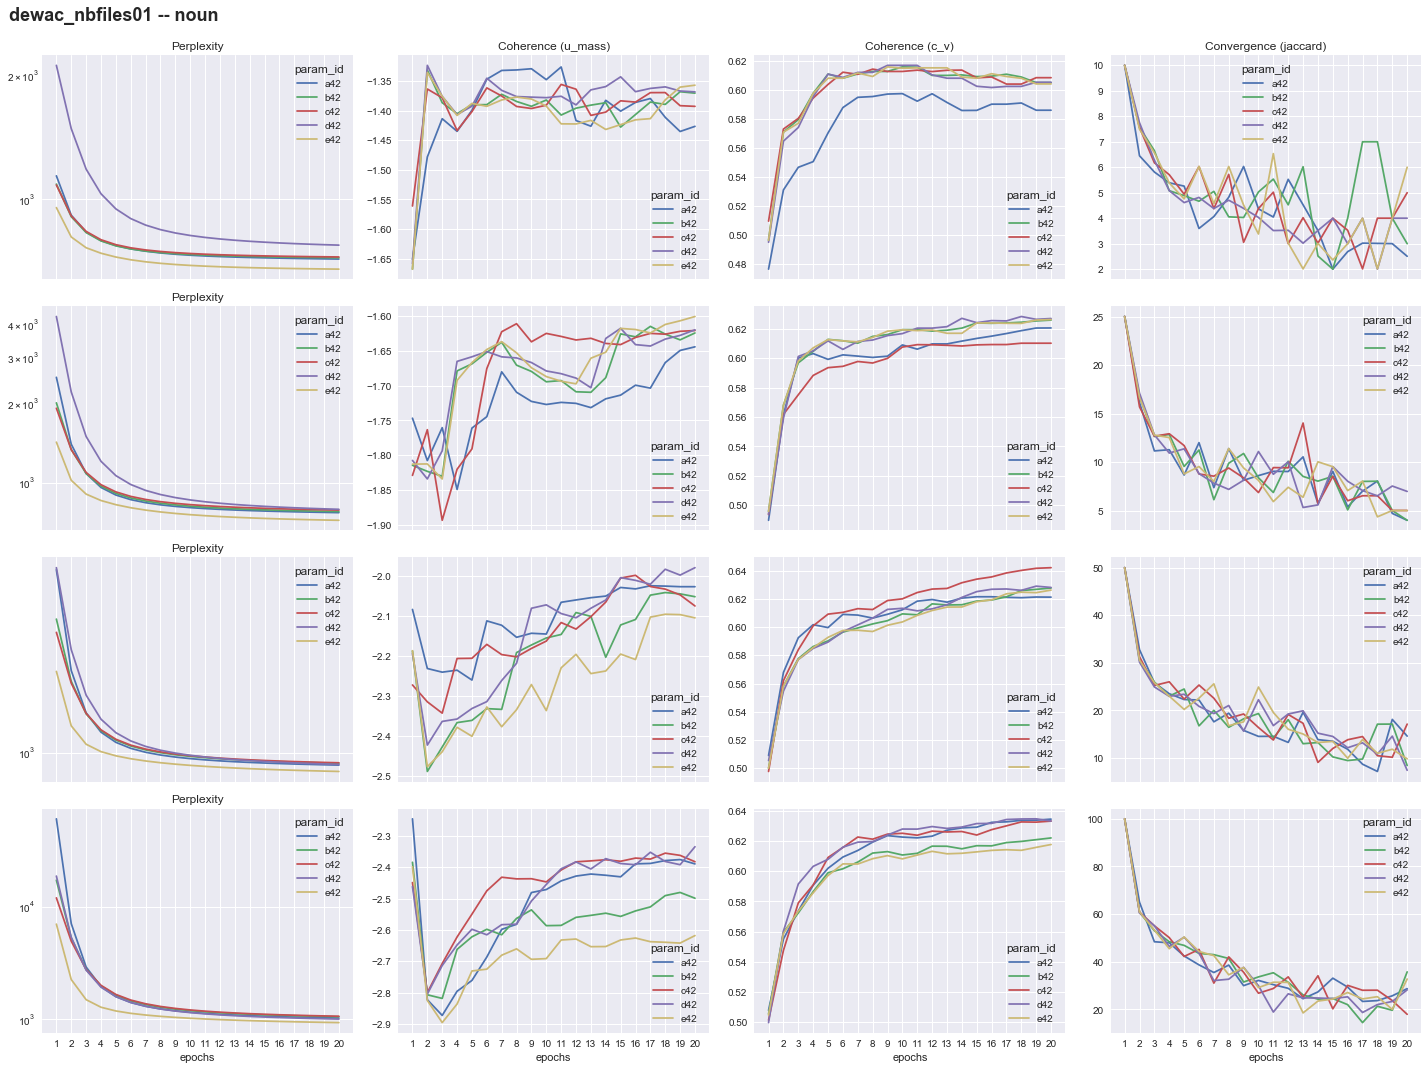

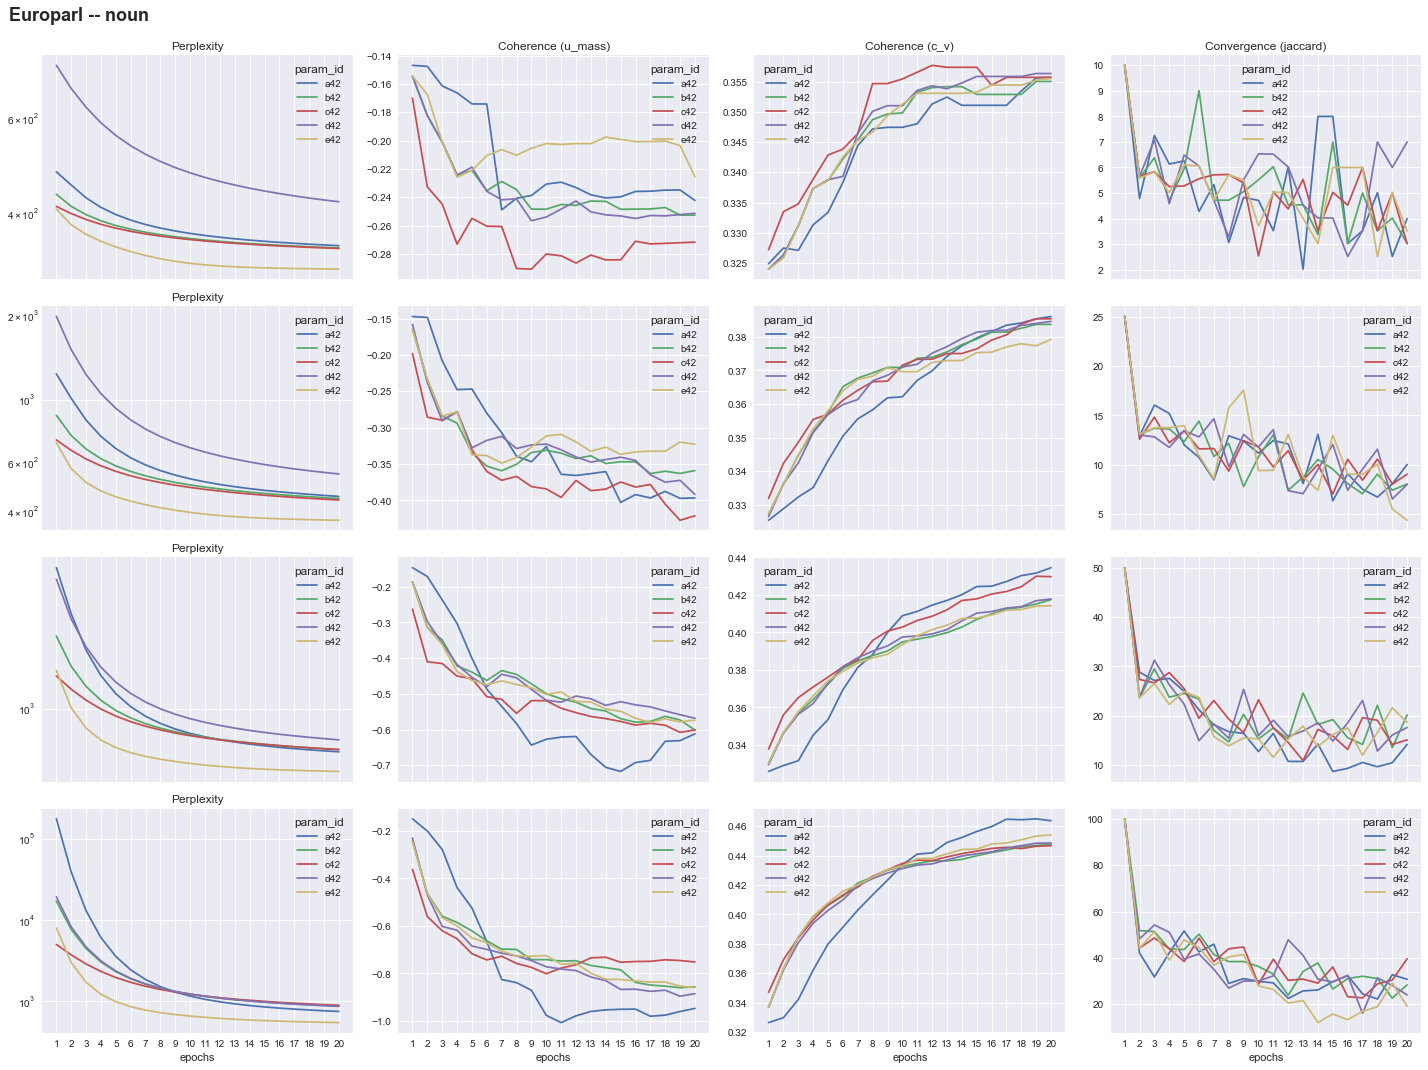

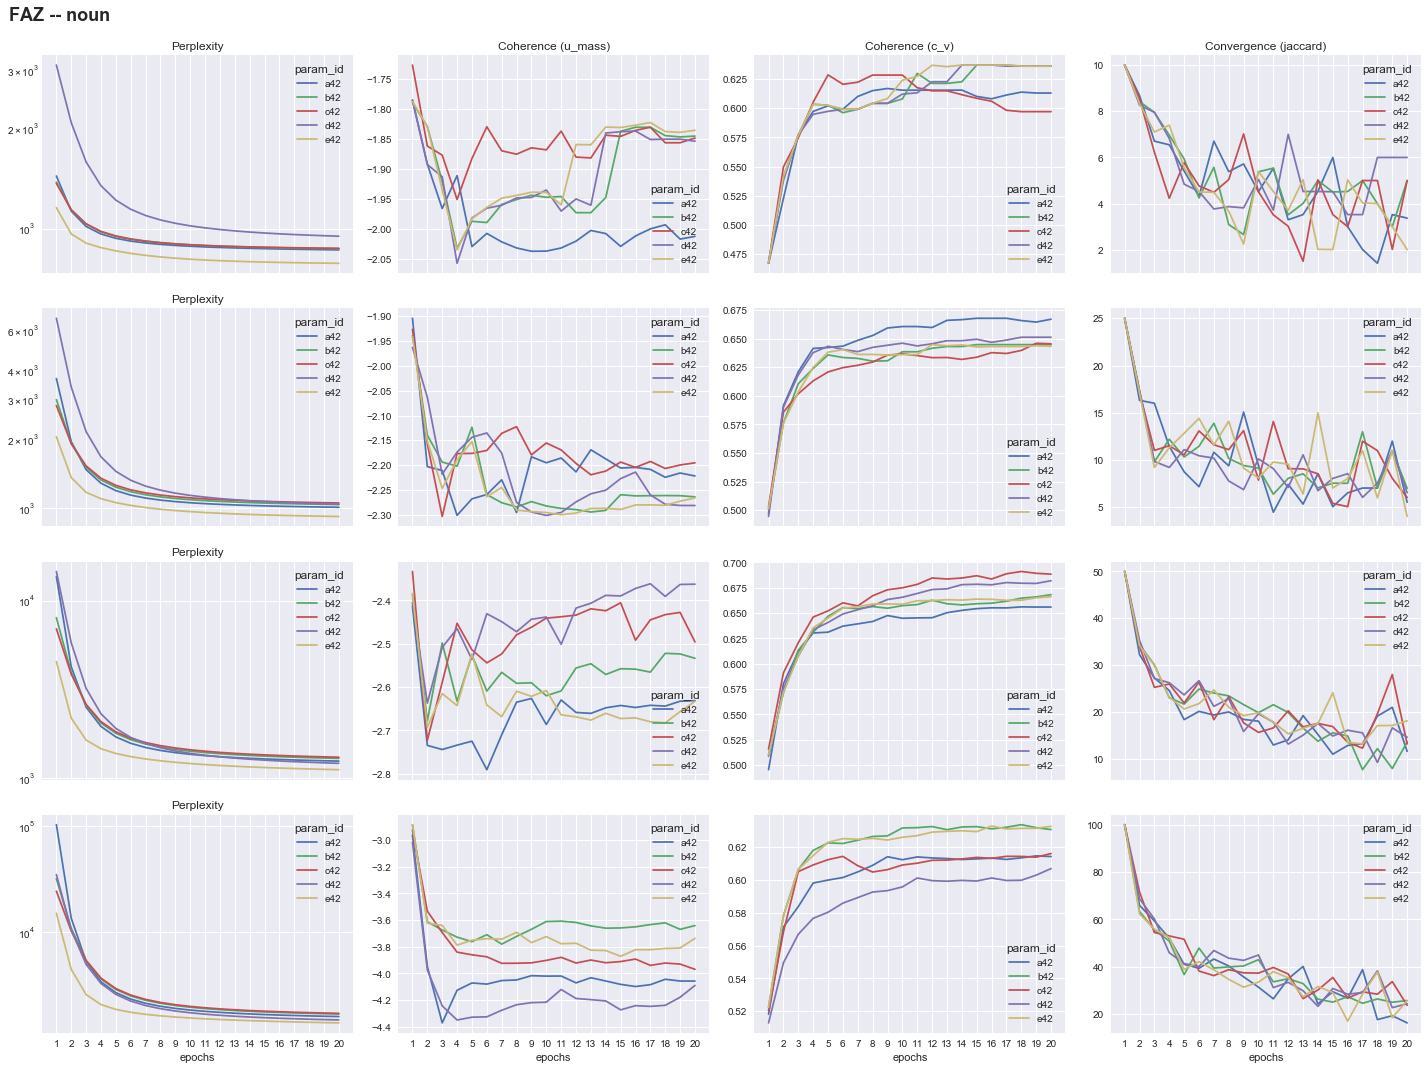

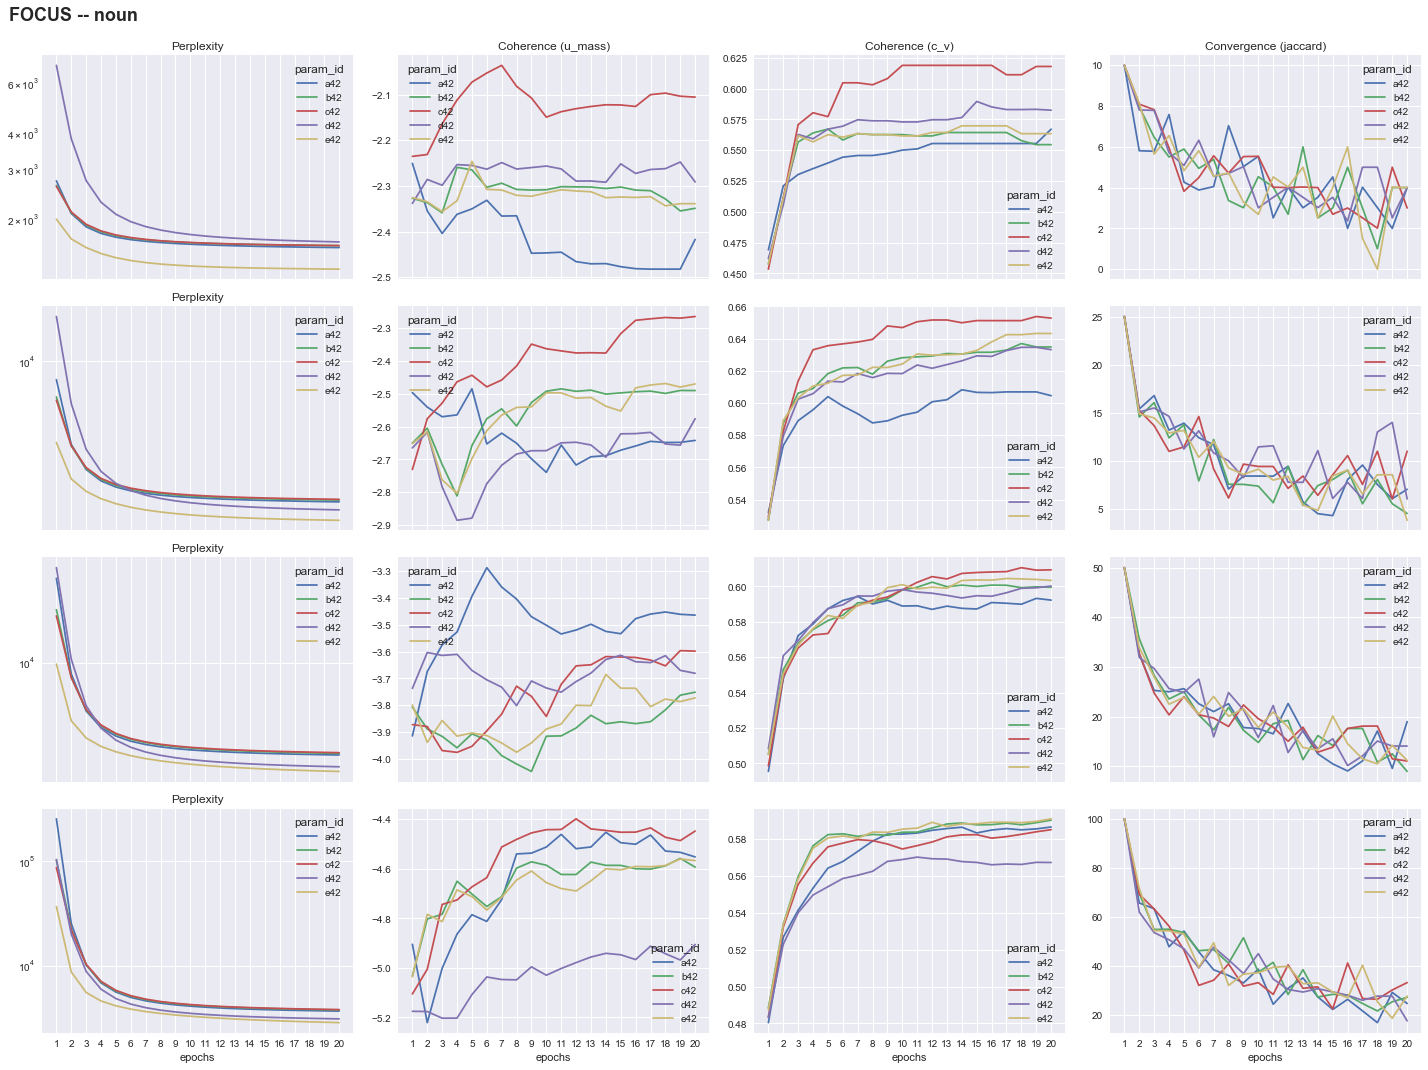

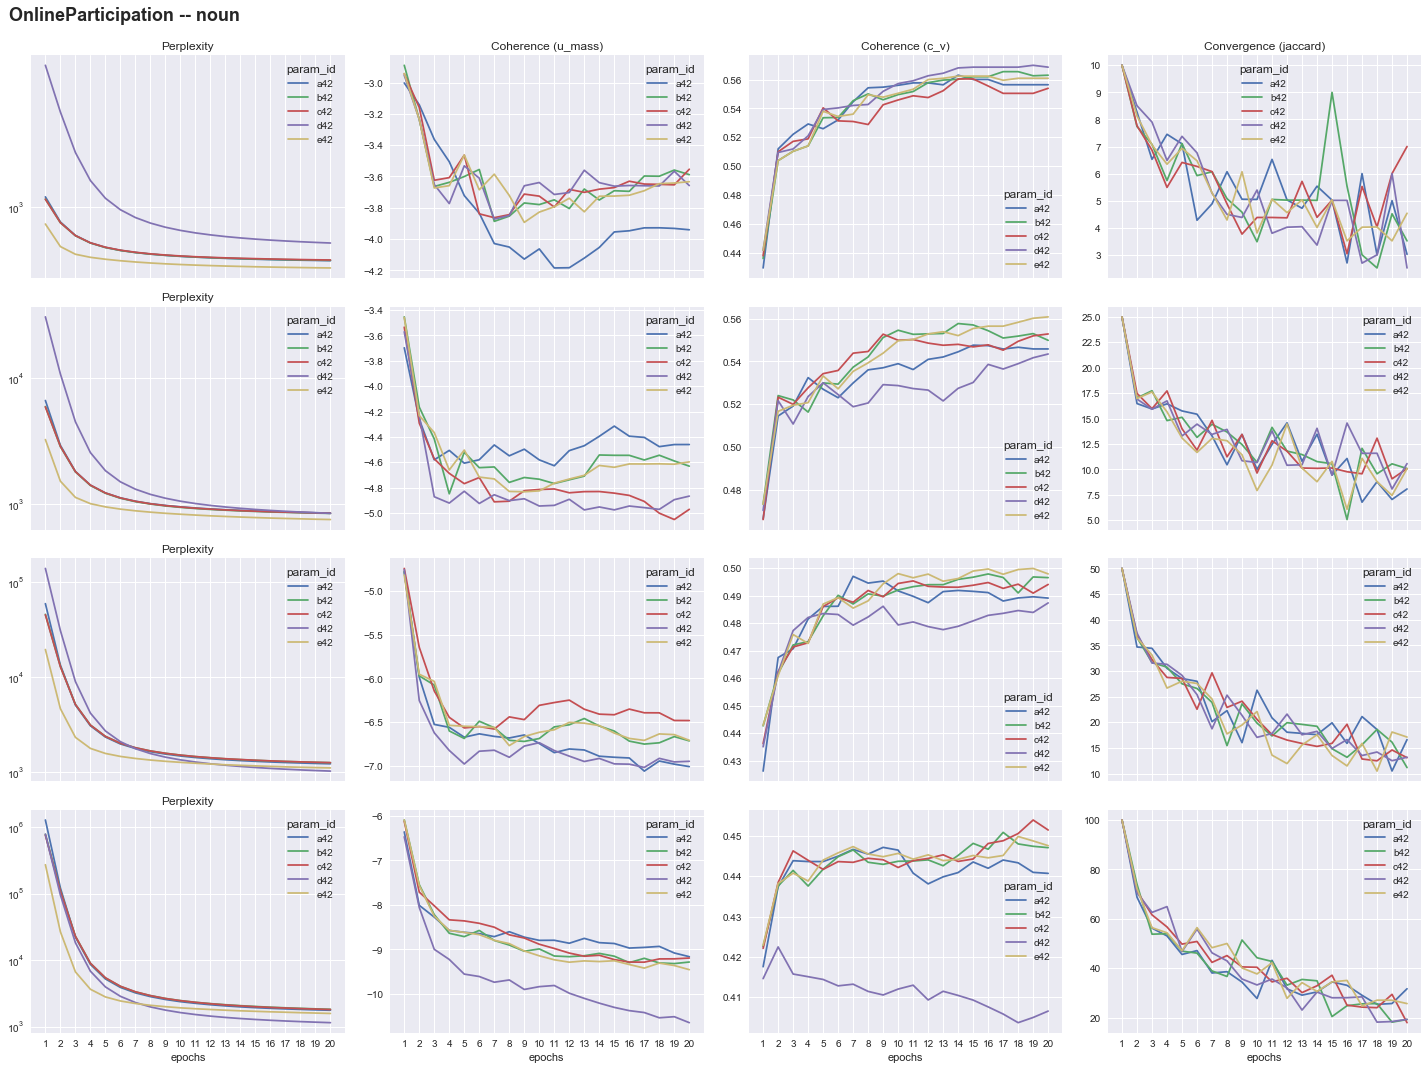

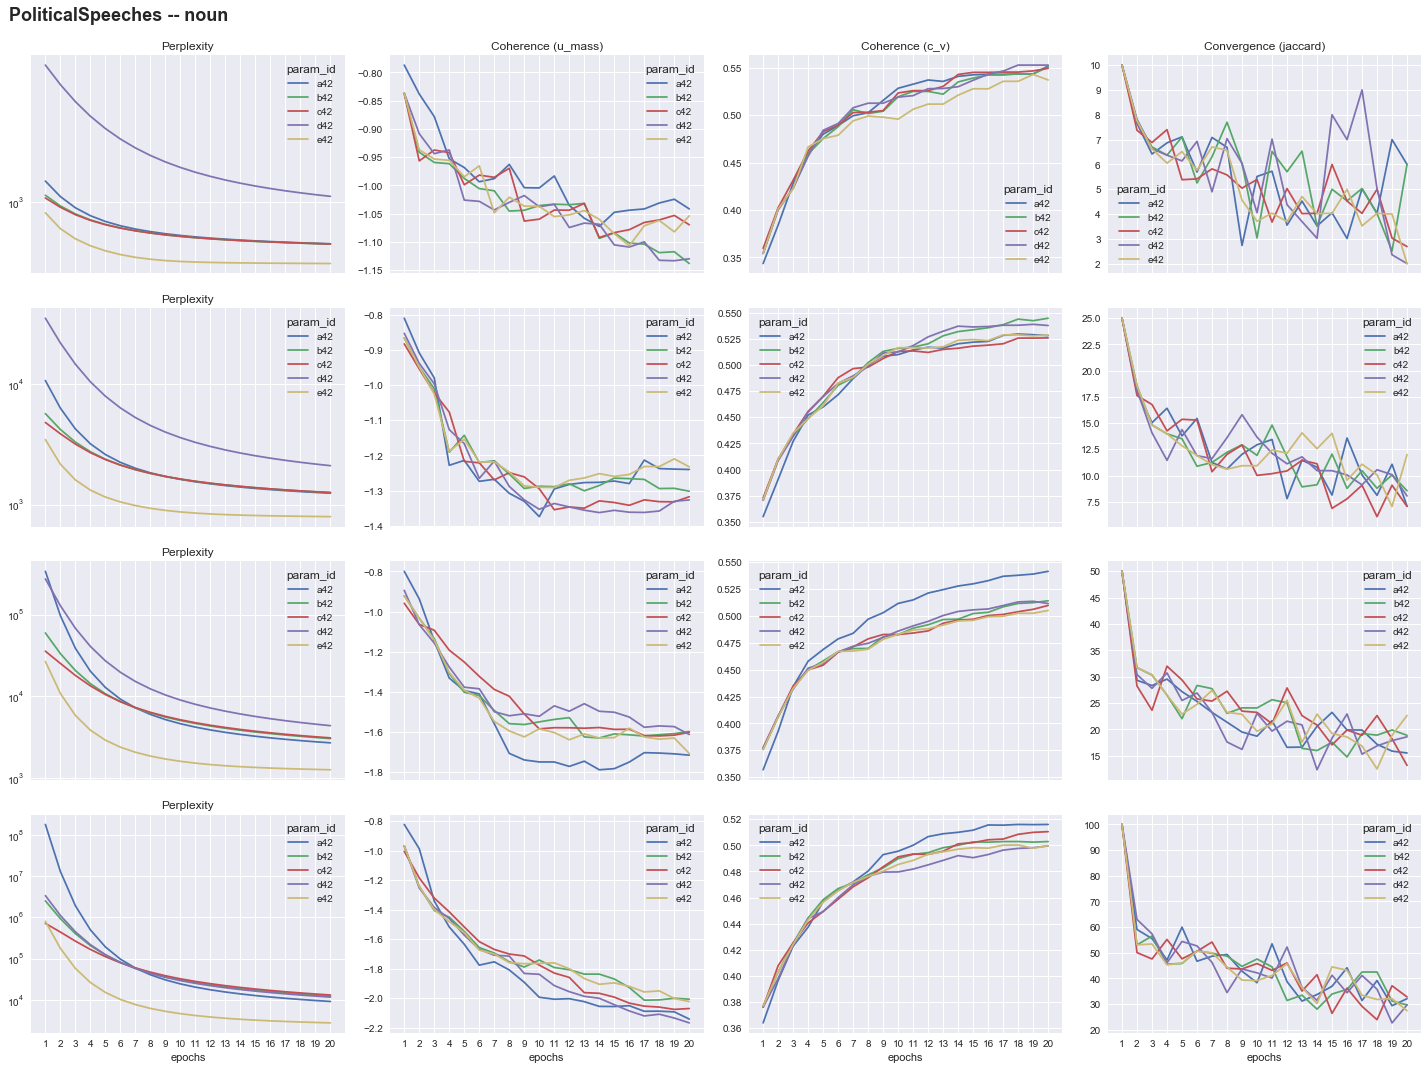

In [22]:
# NOUNs only
version = 'noun'

dfdewa1, dewa1 = run(DATASETS['dewa'], nbfiles=1, version=version)
dfe, e = run(DATASETS['E'], version=version)
dffa, fa = run(DATASETS['FA'], version=version)
dffo, fo = run(DATASETS['FO'], version=version)
dfo, o = run(DATASETS['O'], version=version)
dfp, p = run(DATASETS['P'], version=version)

alldata = {
    'dewa1': dewa1,
    'E': e,
    'FA': fa,
    'FO': fo,
    'O': o,
    'P': p
}

for k, v in islice(alldata.items(), None):
    plot(k, v, version)

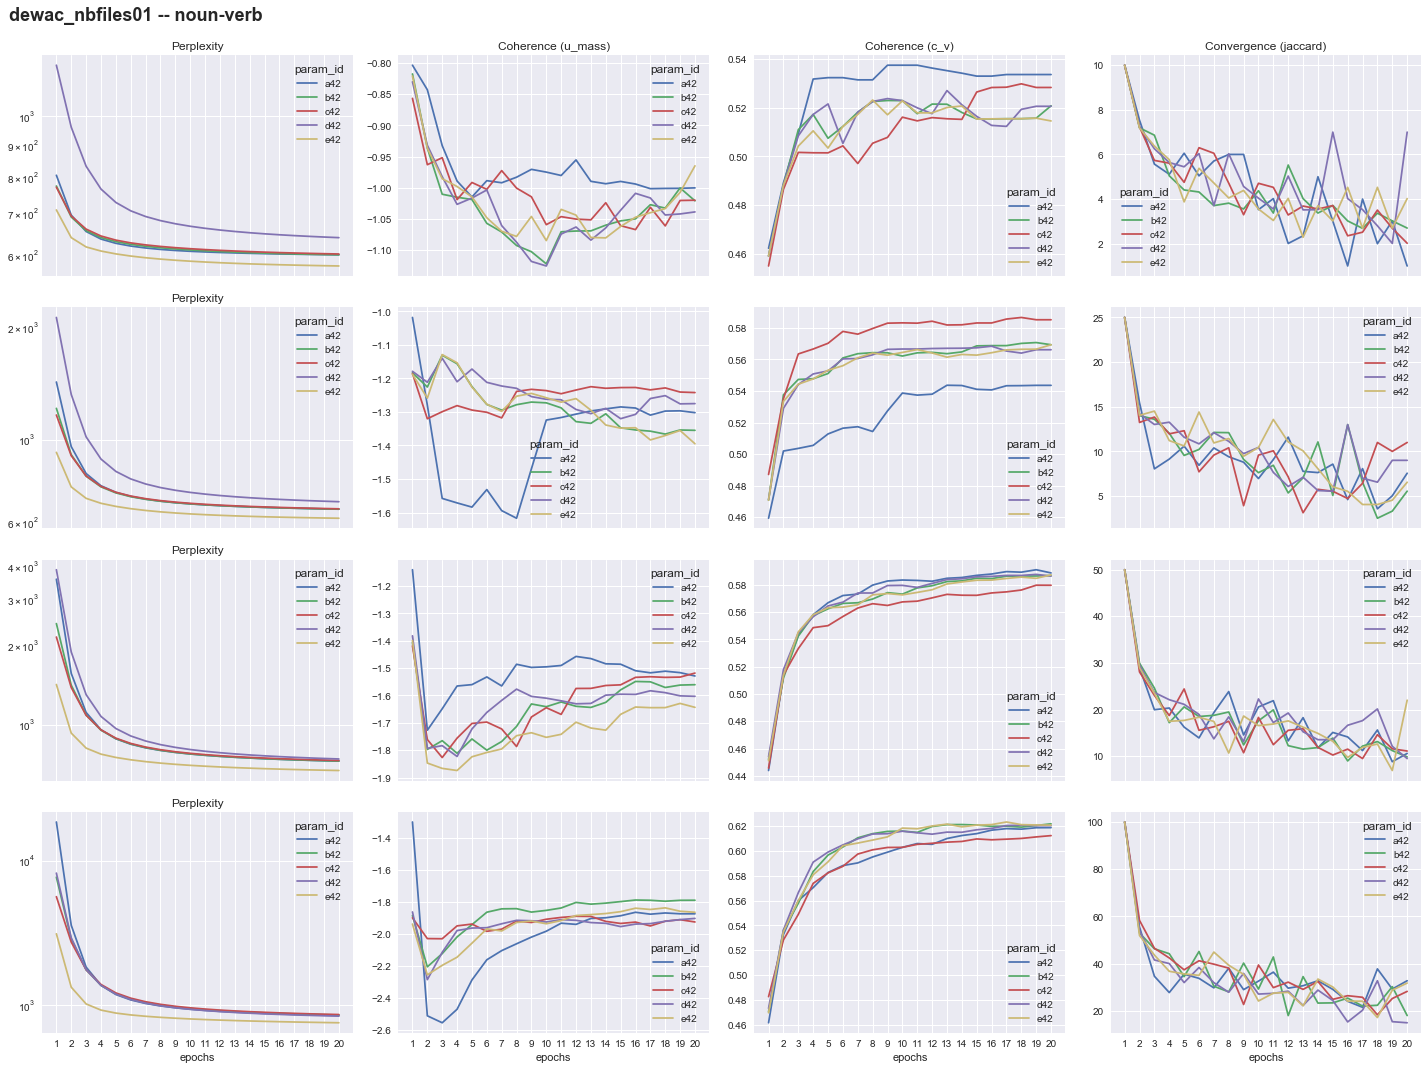

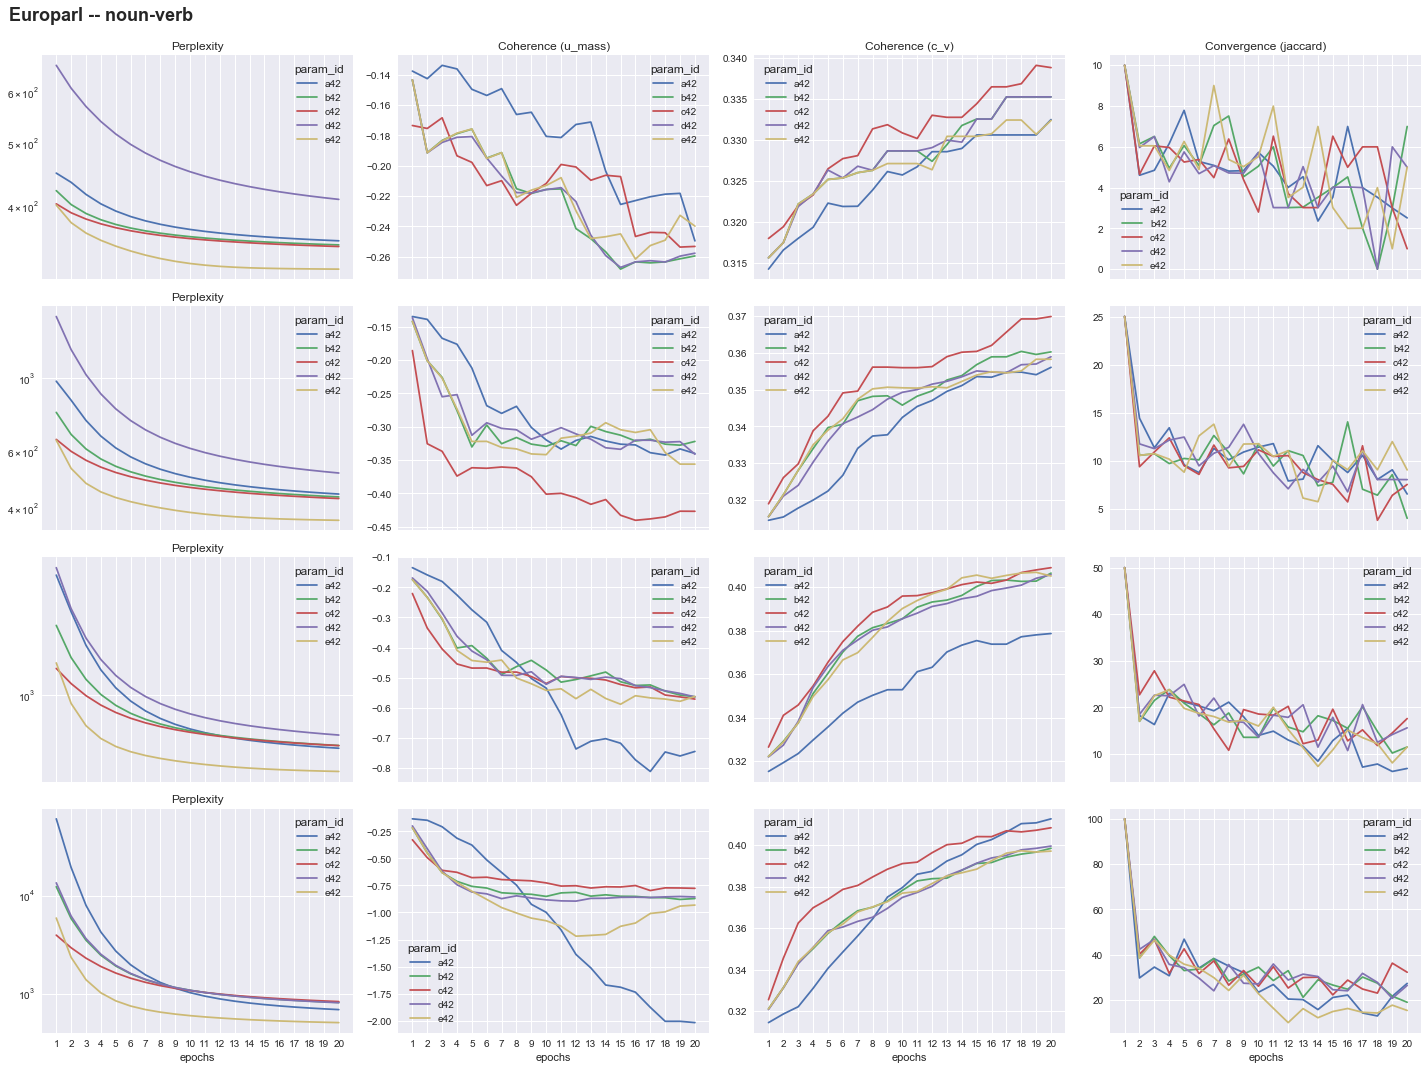

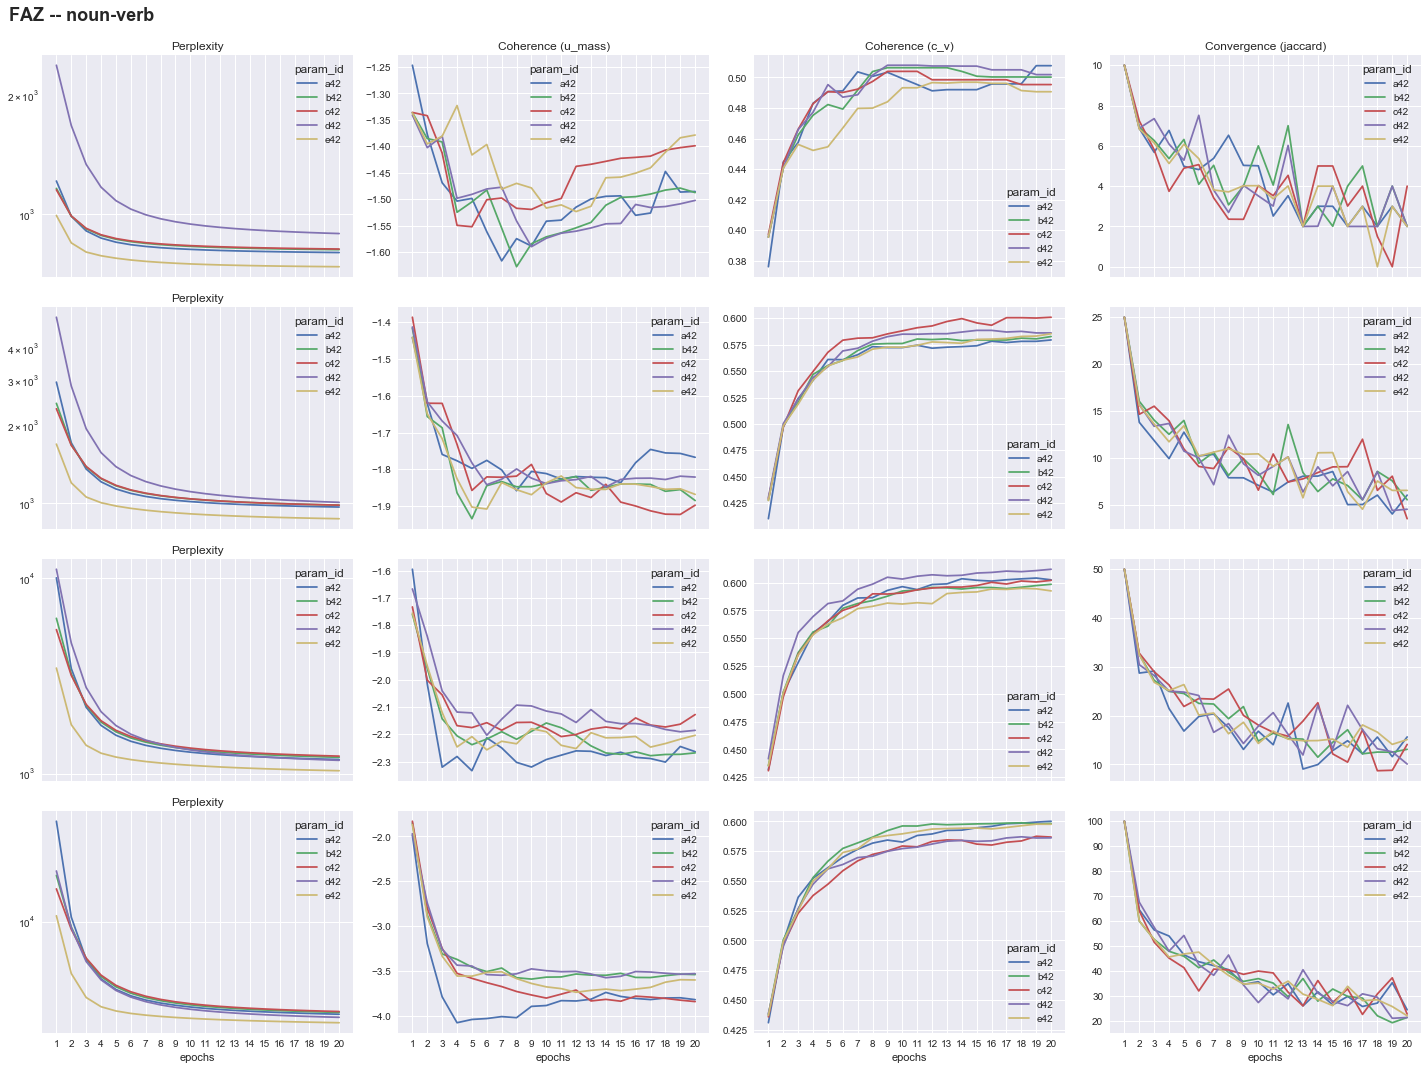

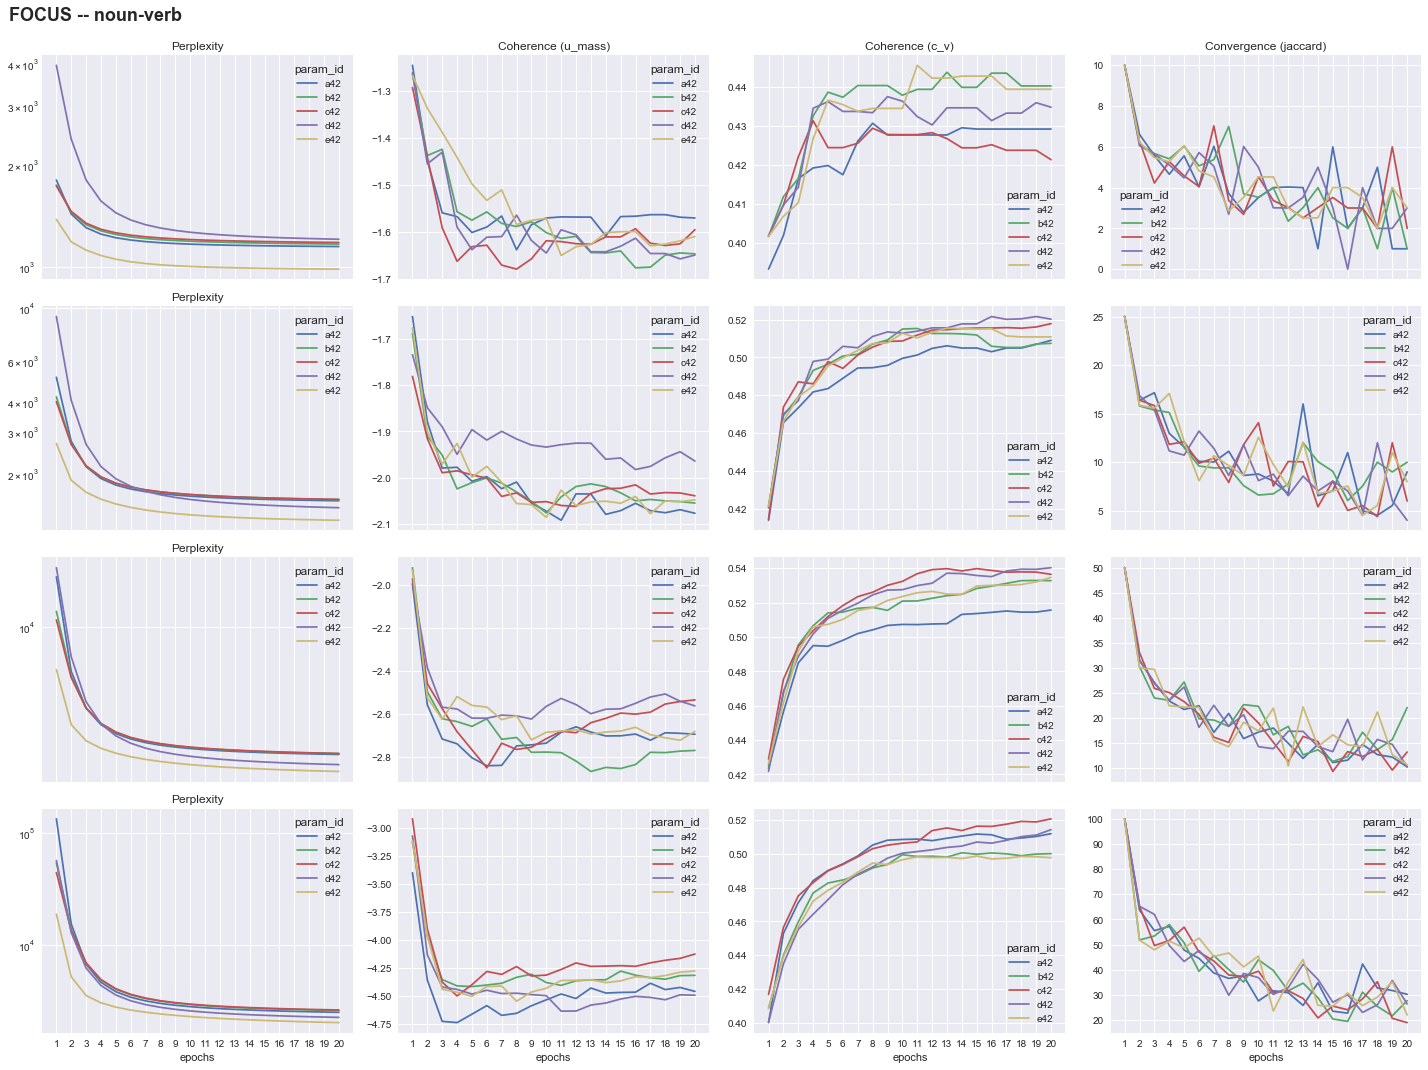

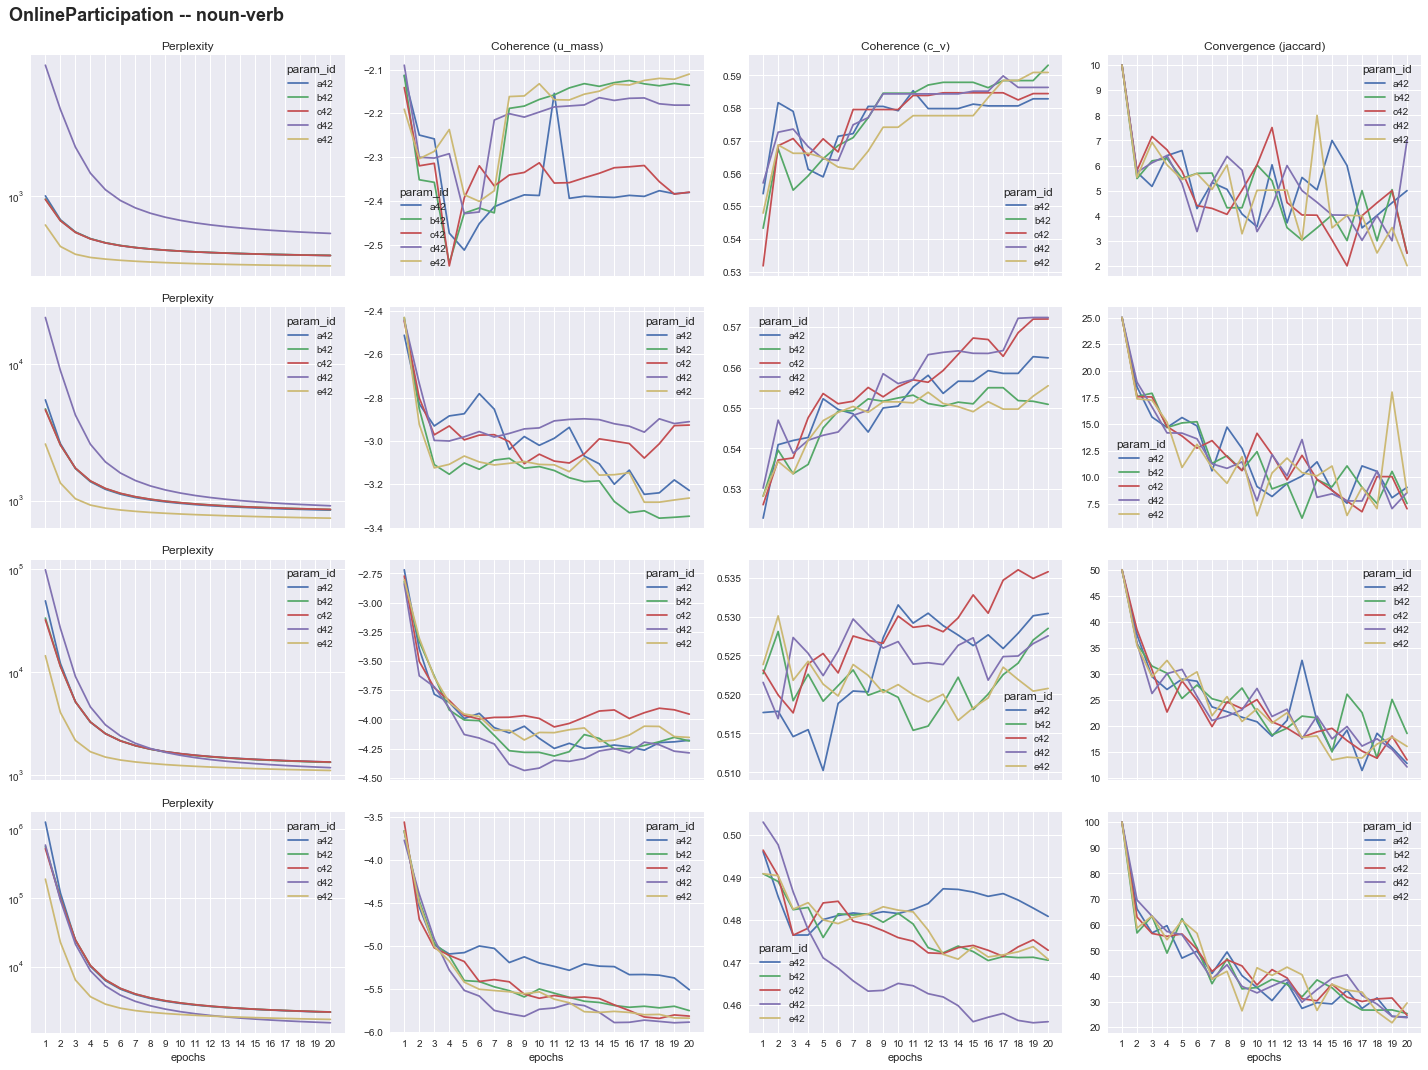

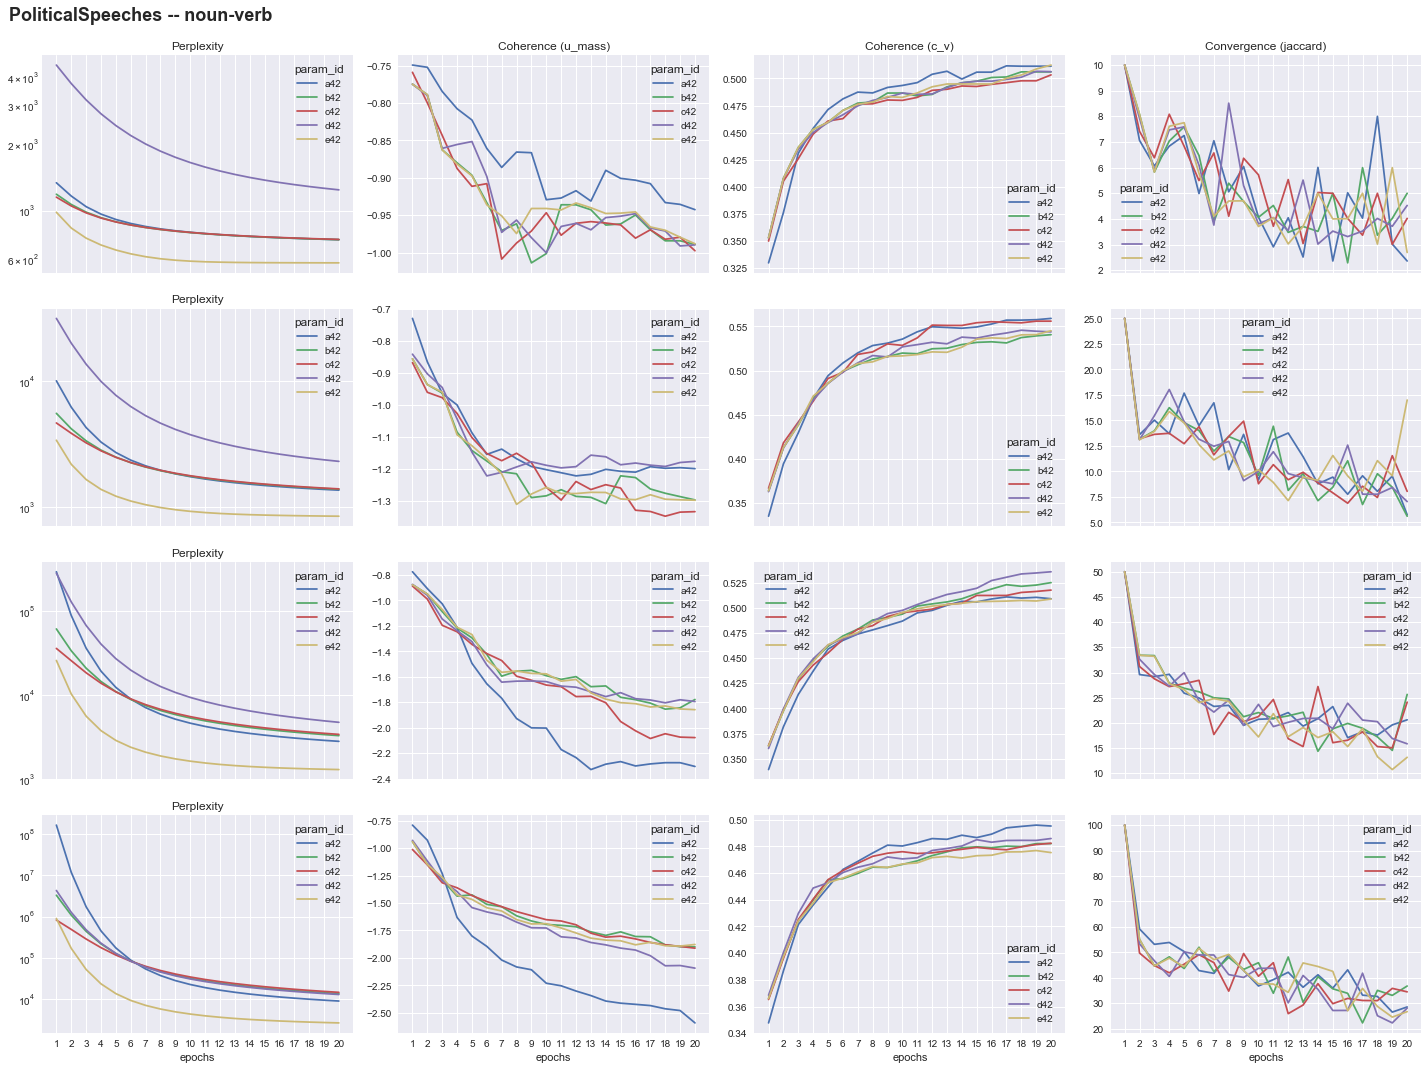

In [17]:
# NOUNs and VERBs
version = 'noun-verb'

dfdewa1, dewa1 = run(DATASETS['dewa'], nbfiles=1, version=version)
dfe, e = run(DATASETS['E'], version=version)
dffa, fa = run(DATASETS['FA'], version=version)
dffo, fo = run(DATASETS['FO'], version=version)
dfo, o = run(DATASETS['O'], version=version)
dfp, p = run(DATASETS['P'], version=version)


alldata = {
    'dewa1': dewa1,
    'E': e,
    'FA': fa,
    'FO': fo,
    'O': o,
    'P': p
}

for k, v in islice(alldata.items(), None):
    plot(k, v, version)

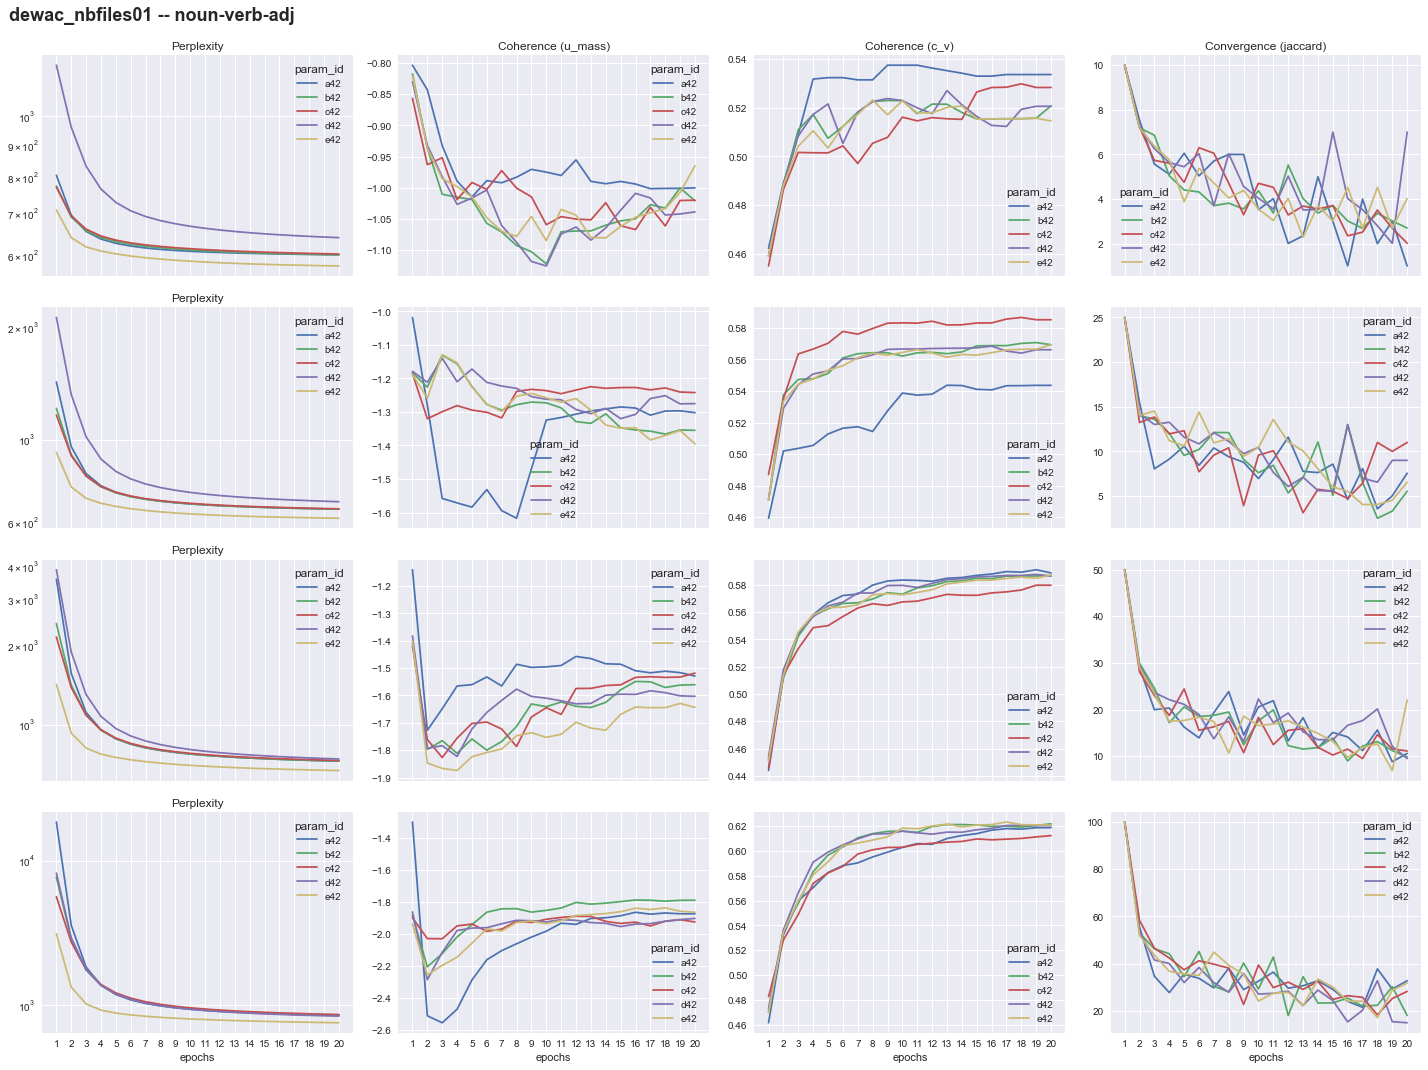

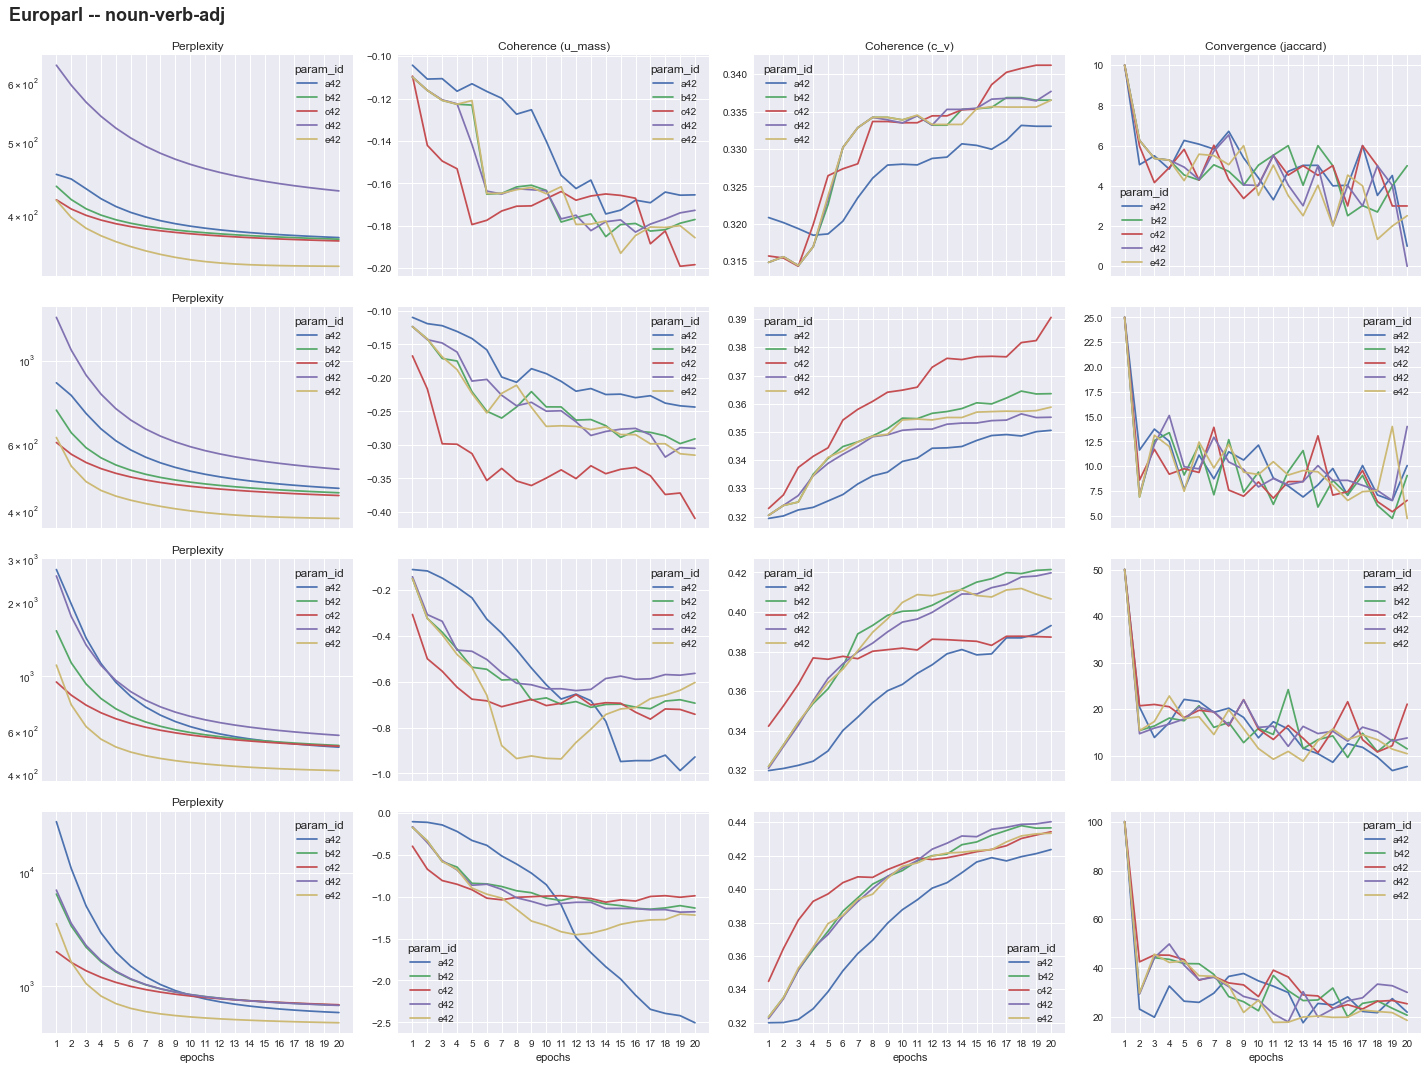

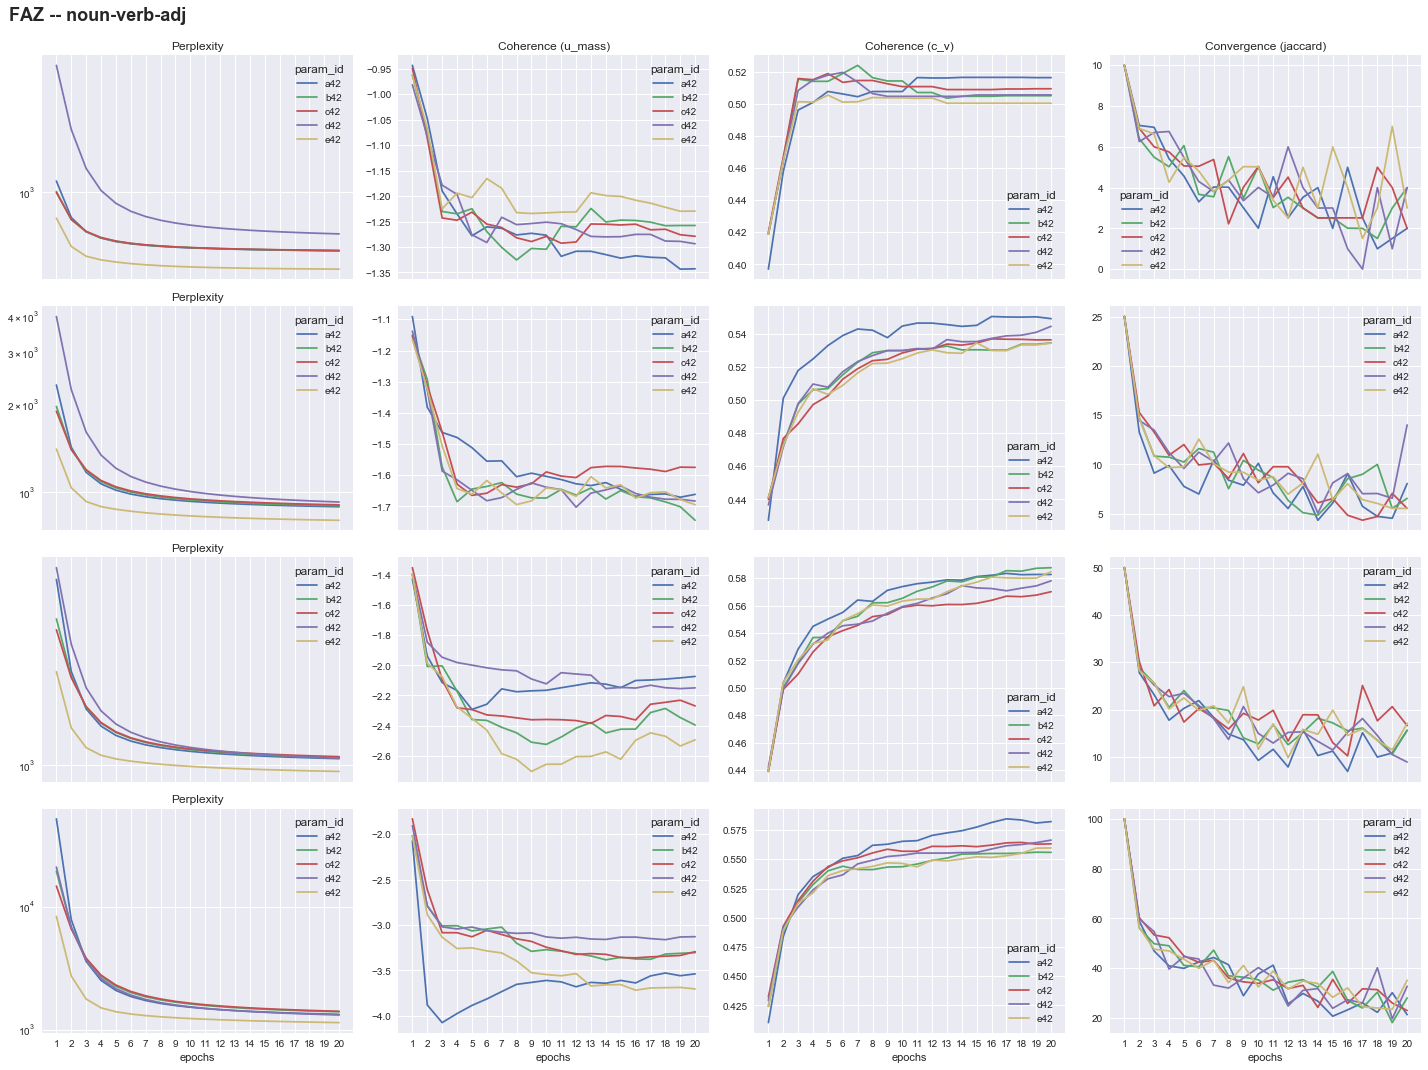

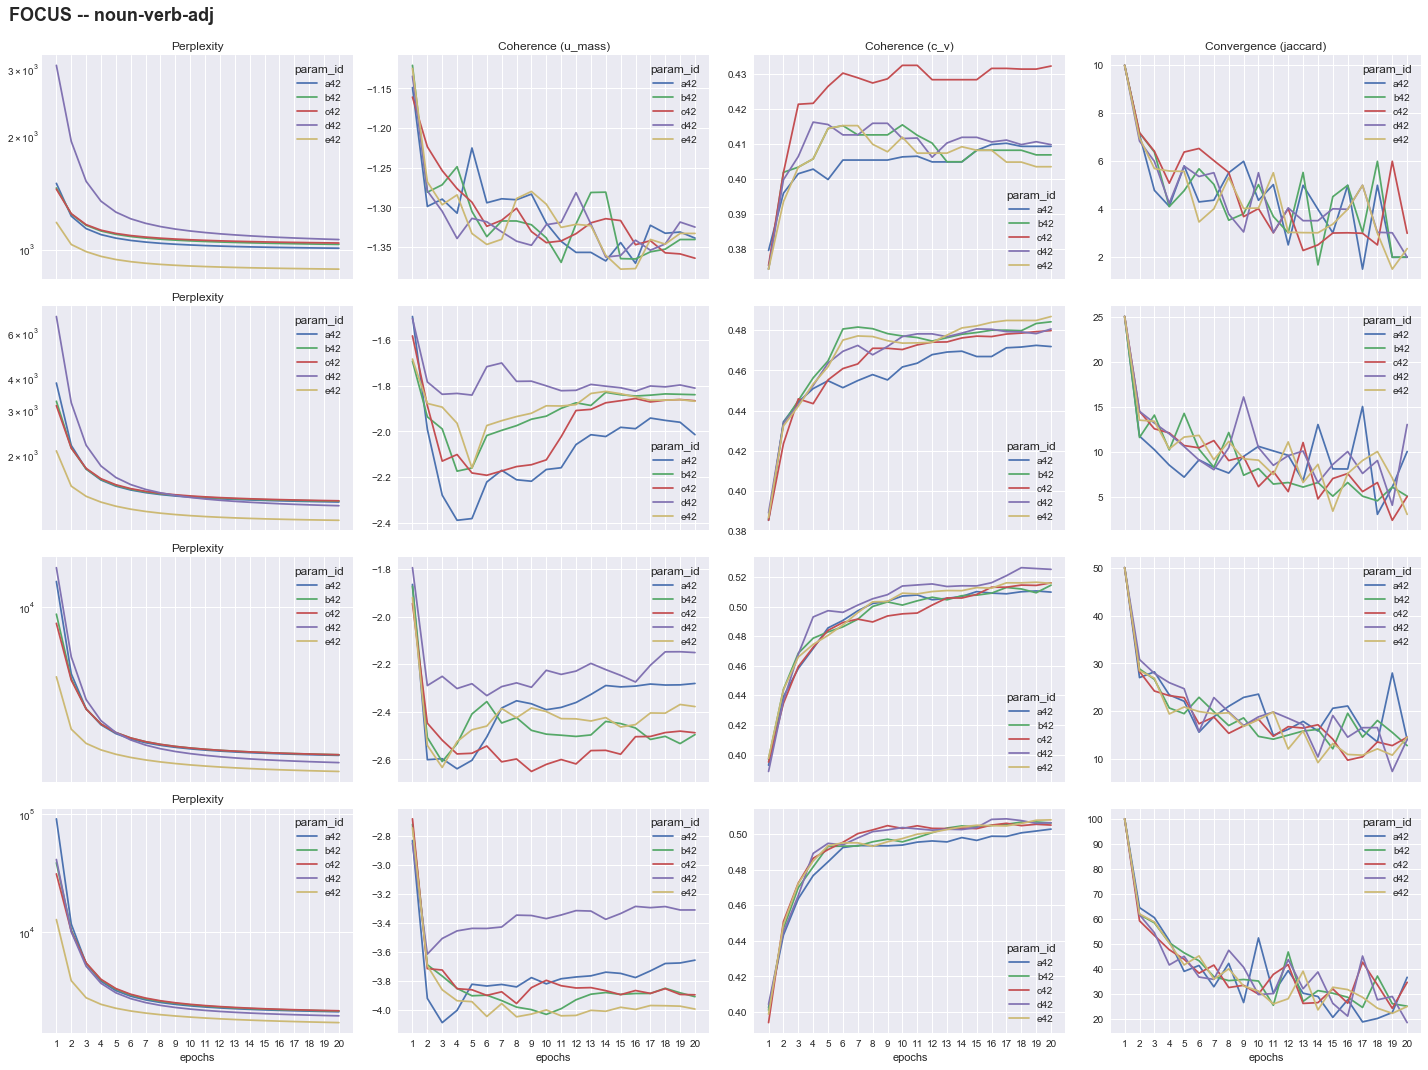

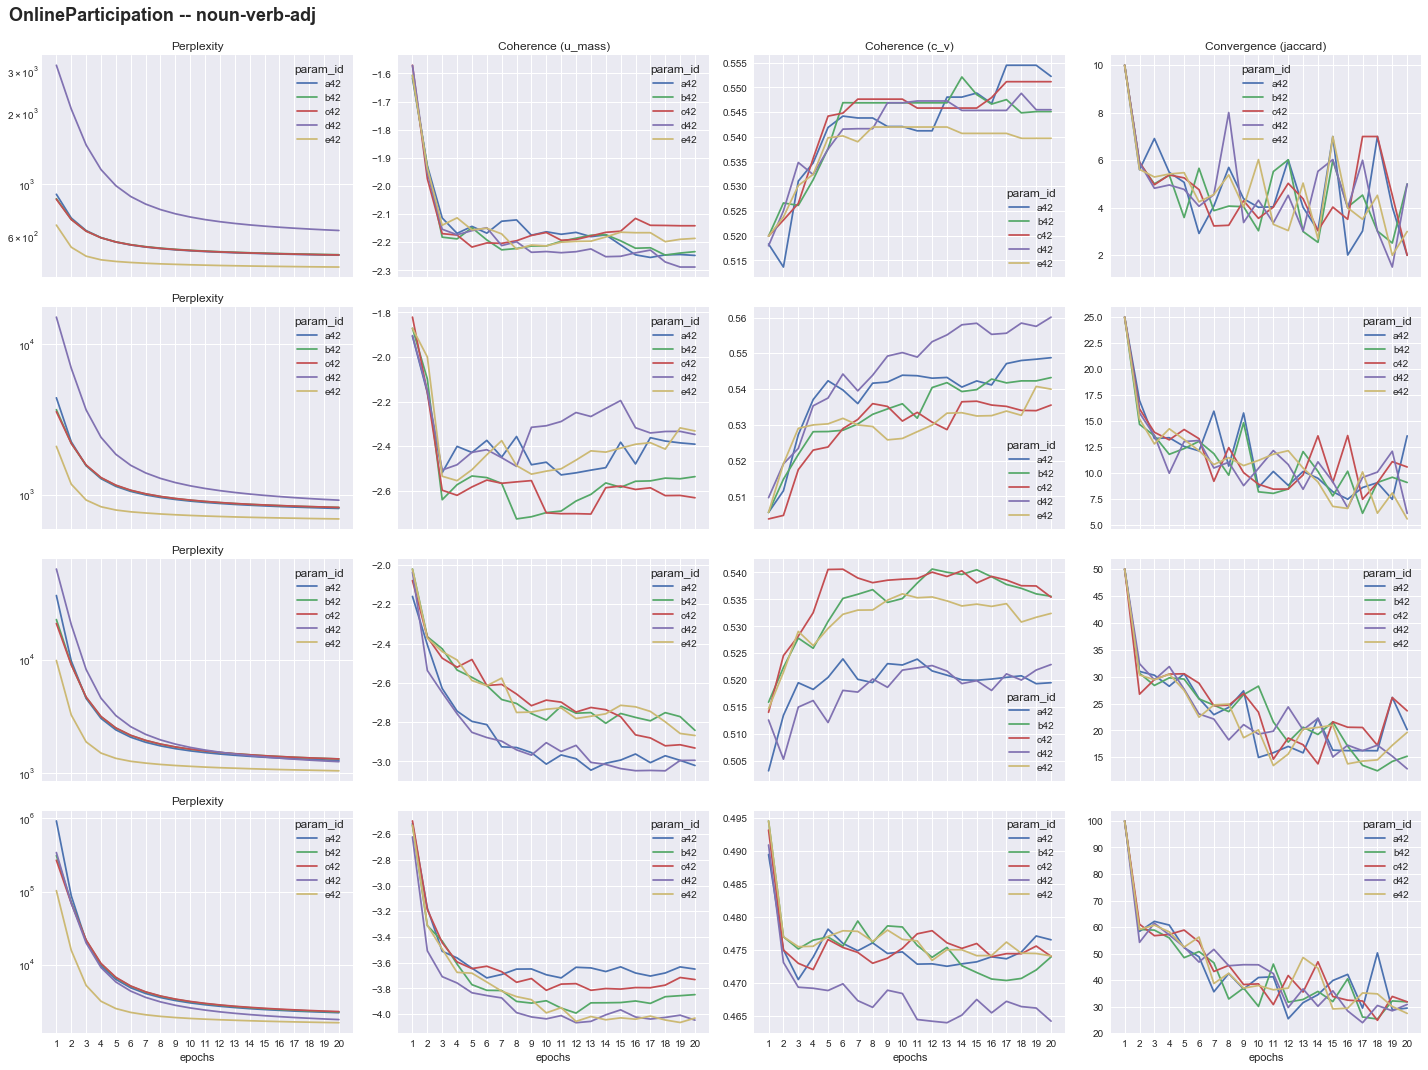

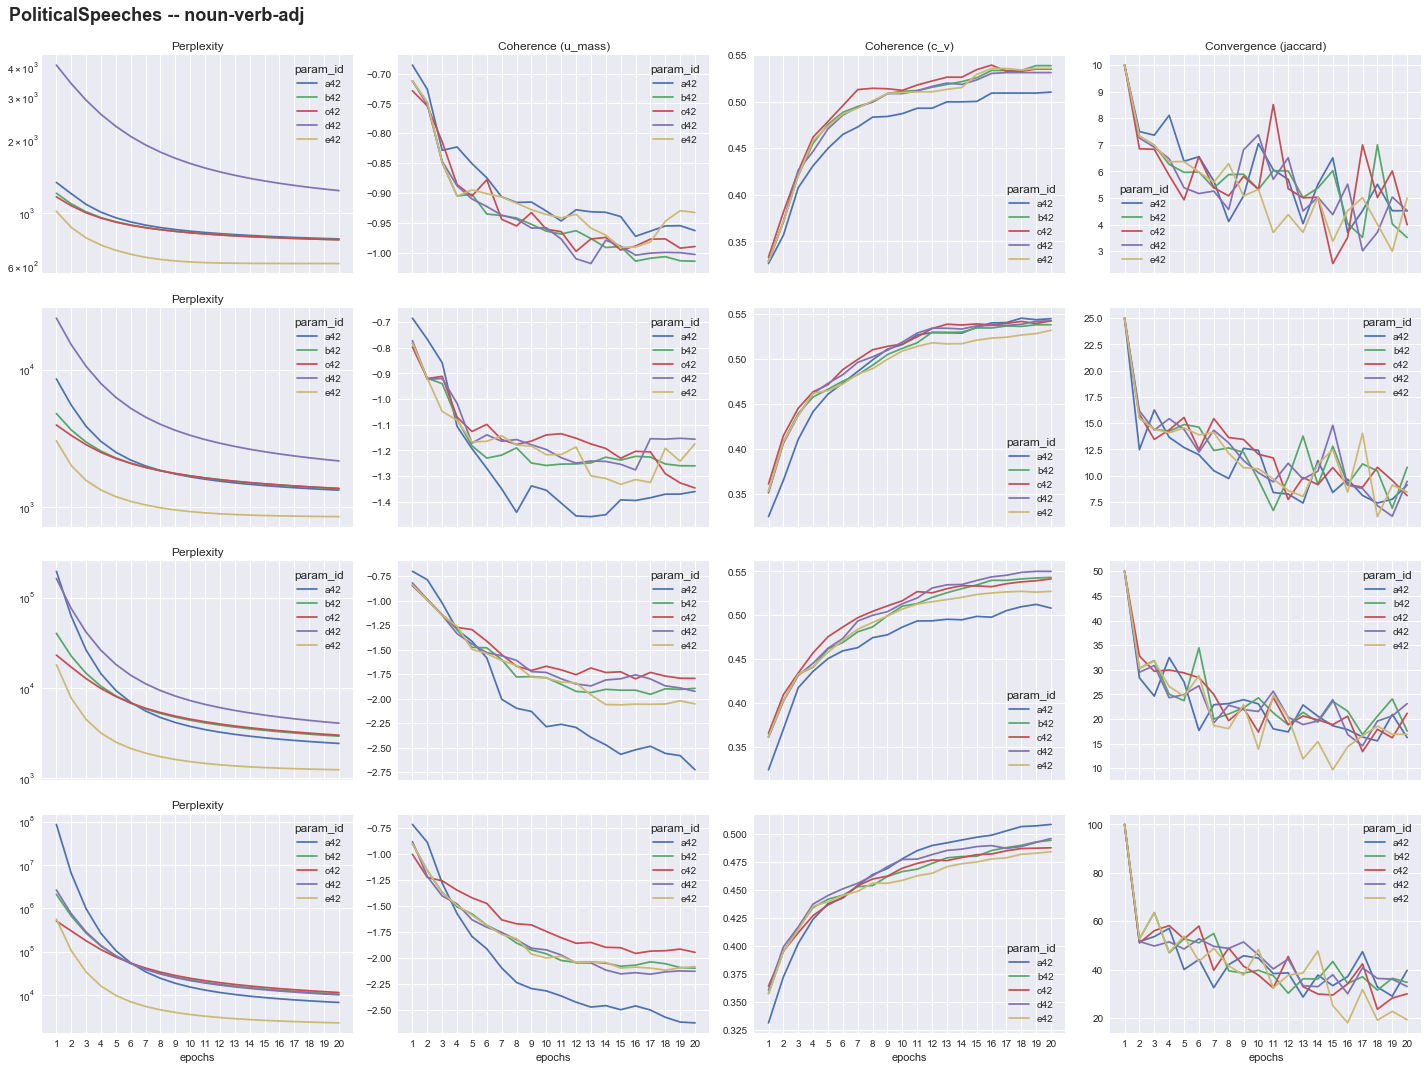

In [18]:
# NOUNs and VERBs
version = 'noun-verb-adj'

dfdewa1, dewa1 = run(DATASETS['dewa'], nbfiles=1, version=version)
dfe, e = run(DATASETS['E'], version=version)
dffa, fa = run(DATASETS['FA'], version=version)
dffo, fo = run(DATASETS['FO'], version=version)
dfo, o = run(DATASETS['O'], version=version)
dfp, p = run(DATASETS['P'], version=version)


alldata = {
    'dewa1': dewa1,
    'E': e,
    'FA': fa,
    'FO': fo,
    'O': o,
    'P': p
}

for k, v in islice(alldata.items(), None):
    plot(k, v, version)